In [910]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [792]:
fifa = pd.read_csv('fifa21_male2.csv')

C:\dataanalyst\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [793]:
fifa.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [794]:
display(fifa)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [795]:
column=fifa.columns

In [796]:
column

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [797]:
#We want to understand the different types of columns

In [798]:
fifa.describe().columns

Index(['ID', 'Age', 'OVA', 'BOV', 'POT', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [799]:
fifa.select_dtypes('object').columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [800]:
fifa.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [801]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [802]:
fifa.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [803]:
fifa.isnull().sum().sort_values(ascending=False).head(20) # we didn't use any of these columns in our analysis

Loan Date End     16215
Composure           423
Position            413
D/W                  89
A/W                  89
Balance              58
Joined               58
Agility              58
Vision               58
Jumping              58
Volleys              58
Sliding Tackle       58
Curve                58
Club Logo            23
Club                 23
Positioning           7
Interceptions         7
SHO                   0
PHY                   0
DRI                   0
dtype: int64

In [804]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [805]:
nat_cnt=fifa.groupby('Nationality').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_10_nat_cnt=nat_cnt[:10]

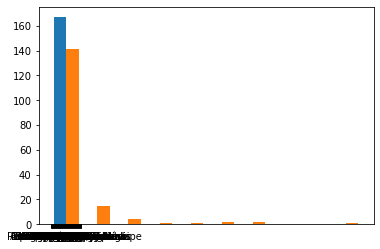

In [806]:
plt.hist(nat_cnt)
plt.show() # we can see that a few countries have mostly all the data

In [807]:
nat_cnt

,Nationality,Counts
48,England,1707
58,Germany,1154
143,Spain,1121
54,France,990
20,Brazil,857
...,...,...
109,New Caledonia,1
111,Nicaragua,1
73,Indonesia,1
132,Saint Lucia,1


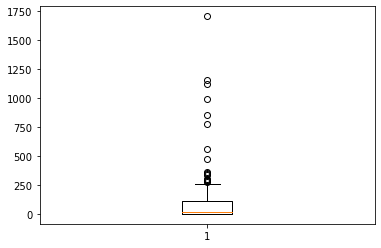

In [808]:
plt.boxplot(nat_cnt['Counts'])
plt.show() # The countries we chose to analyse were the outliers, because otherwise the mean values won't make any sense

In [809]:
display(top_10_nat_cnt) # we realised that some countries have very high number of players and some have very few.
# Considering we are dealing with means we choose countries with higher number of players and didn't consider other countries
# Countries with higher value of players were outliers but also happened to strong football playing nations
# These countries also have better footbal leagues

,Nationality,Counts
48,England,1707
58,Germany,1154
143,Spain,1121
54,France,990
20,Brazil,857
6,Argentina,778
77,Italy,565
108,Netherlands,475
124,Portugal,365
159,United States,358


In [810]:
x = top_10_nat_cnt['Nationality']

In [811]:
y = top_10_nat_cnt['Counts']

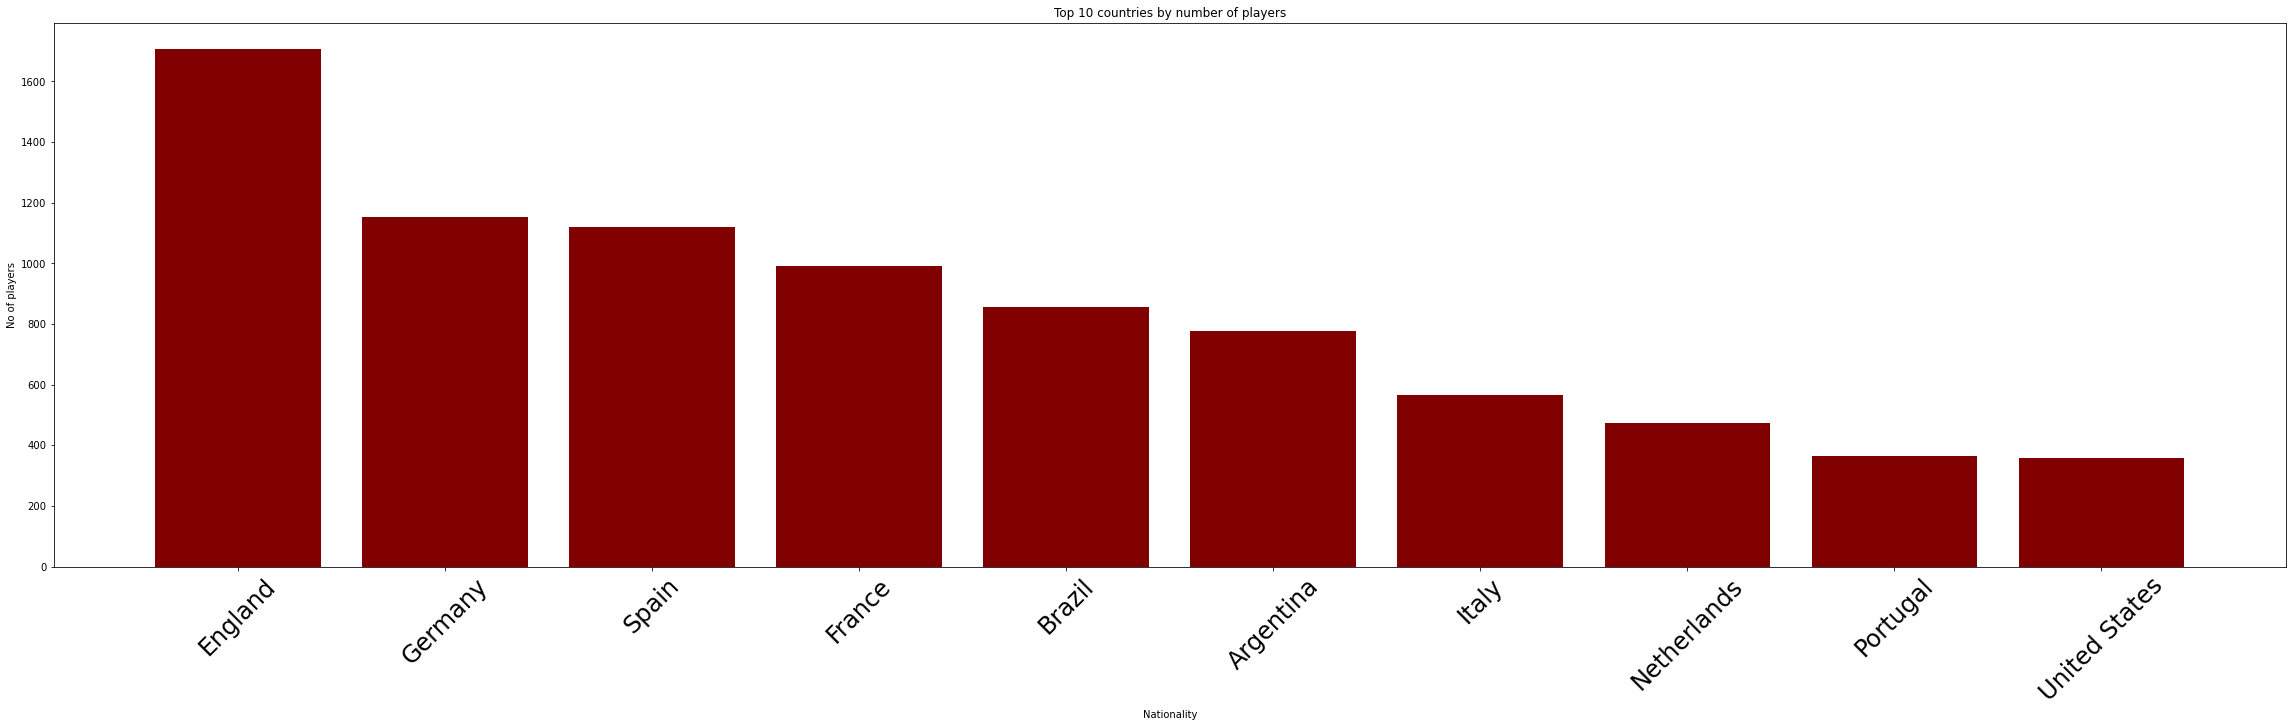

In [812]:
plt.figure(figsize = (40,10))
plt.bar(x, y, color ='maroon')
plt.xlabel('Nationality')
plt.xticks(fontsize=24,rotation=45)

plt.ylabel("No of players")
plt.title("Top 10 countries by number of players")
plt.show()

In [813]:
nat_cnt.describe()

,Counts
count,167.000000
mean,102.544910
std,225.488431
min,1.000000
25%,3.500000
50%,19.000000
75%,108.500000
max,1707.000000


In [814]:
fifatop_10=fifa[(fifa['Nationality']=='United States')|(fifa['Nationality']=='Portugal')|(fifa['Nationality']=='Netherlands')|(fifa['Nationality']=='Italy')|(fifa['Nationality']=='Argentina')|(fifa['Nationality']=='Brazil')|(fifa['Nationality']=='France')|(fifa['Nationality']=='Spain')|(fifa['Nationality']=='Germany')|(fifa['Nationality']=='England')]

In [815]:
fifatop_10

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
5,61,D. Odonkor,27,66,Germany,Alemannia Aachen,66,RW,RW RM,https://cdn.sofifa.com/players/000/061/12_120.png,...,47+0,47+0,50+0,46+0,41+0,41+0,41+0,46+0,13+0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17113,259075,Yan Couto,18,64,Brazil,Girona FC,65,RWB,RB,https://cdn.sofifa.com/players/259/075/20_120.png,...,59+2,59+2,63+2,62+2,58+2,58+2,58+2,62+2,14+2,Male
17116,259082,J. Lawrence,17,52,Germany,Bayern München II,54,CB,CB,https://cdn.sofifa.com/players/259/082/20_120.png,...,45+2,45+2,47+2,50+2,52+2,52+2,52+2,50+2,14+2,Male
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [816]:
numplayerbycountry = fifa.groupby('Nationality').agg({'Name':'count','Attacking':'mean','OVA':'mean','Defending':'mean', 'Heading Accuracy': 'mean'}).sort_values(by='Name', ascending=False).reset_index()

In [817]:
top20= numplayerbycountry[:20] # According to the previous analysis we selected the top 20 countries
# In order to find this information, the country with the greater possibility to win the world cup is the one with highest OVA
# with this analysis we can also infer that which country has better attacking and better defending
# Brazil has highest OVA 

In [818]:
top20.corr()
# with this analysis we can also infer that which country has better attacking and better defending
# OVA is highly correlated with Attacking, defending and heading accuracy
# OVA has highest correlation with Attcking

,Name,Attacking,OVA,Defending,Heading Accuracy
Name,1.000000,0.067016,0.143727,0.256650,0.239715
Attacking,0.067016,1.000000,0.921938,0.842876,0.839934
OVA,0.143727,0.921938,1.000000,0.751963,0.811890
Defending,0.256650,0.842876,0.751963,1.000000,0.843486
Heading Accuracy,0.239715,0.839934,0.811890,0.843486,1.000000


In [819]:
top20

,Nationality,Name,Attacking,OVA,Defending,Heading Accuracy
0,England,1707,243.161687,63.642648,139.484476,51.365554
1,Germany,1154,247.870017,66.205373,139.844021,51.766898
2,Spain,1121,270.064228,69.619982,147.611062,54.129349
3,France,990,263.356566,67.792929,146.828283,55.847475
4,Brazil,857,285.179697,72.004667,148.564761,58.255543
5,Argentina,778,271.858612,69.668380,145.800771,56.456298
6,Italy,565,261.355752,68.863717,143.017699,55.153982
7,Netherlands,475,257.654737,67.795789,141.155789,53.656842
8,Portugal,365,274.698630,70.569863,151.249315,55.397260
9,United States,358,239.653631,64.201117,134.368715,49.717877


In [820]:
top20[['Attacking', 'OVA', 'Defending', 'Heading Accuracy']].max()

Attacking           285.179697
OVA                  72.004667
Defending           151.249315
Heading Accuracy     58.255543
dtype: float64

In [821]:
# Brazil has the highest OVA, Attacking and Heading accuracy
# Portugal has the highest defending

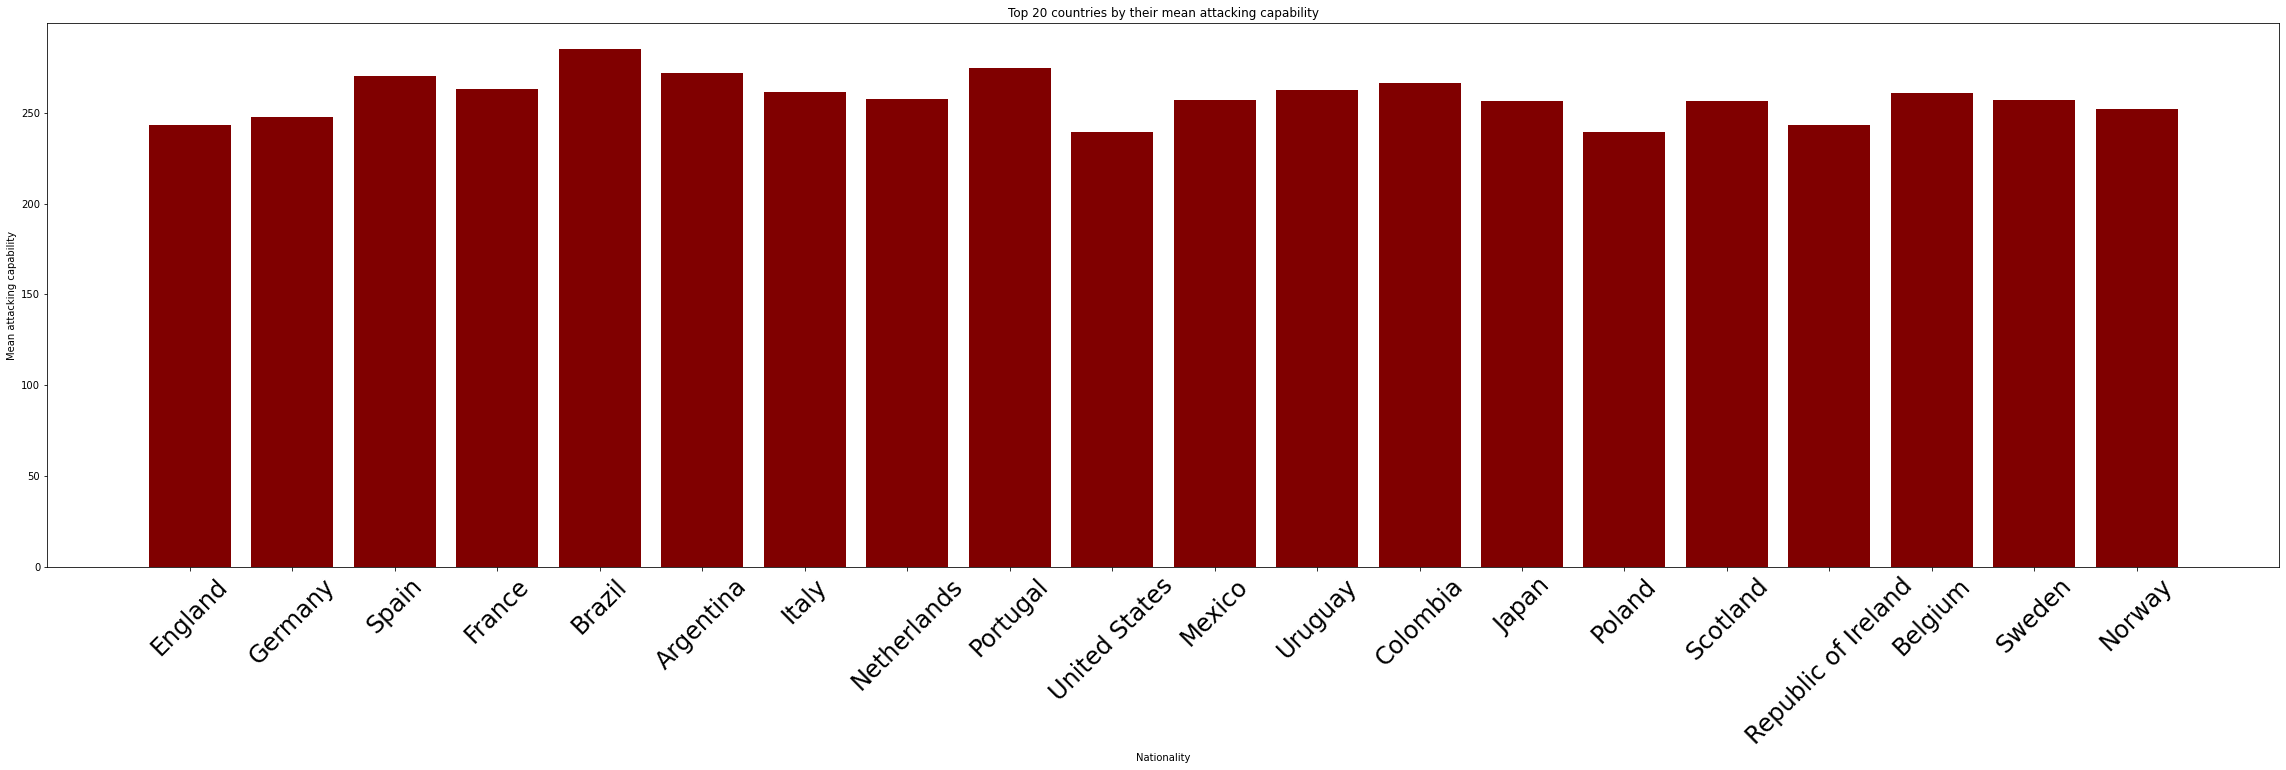

In [822]:
plt.figure(figsize = (40,10))
x=top20['Nationality']
y=top20['Attacking']
plt.bar(x, y, color ='maroon')
plt.xticks(fontsize=24,rotation=45)
plt.xlabel('Nationality')
plt.ylabel("Mean attacking capability")
plt.title("Top 20 countries by their mean attacking capability")
plt.show()

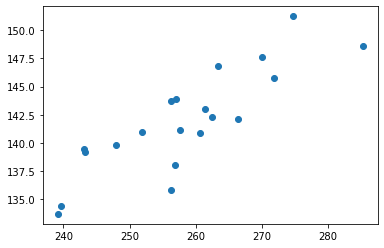

In [823]:
x= top20['Attacking']
y = top20['Defending']
plt.scatter(x, y)

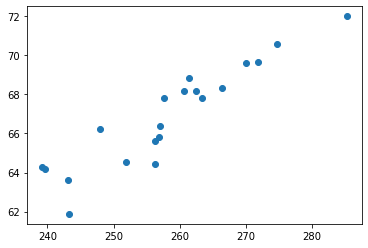

In [824]:
x= top20['Attacking']
y = top20['OVA']
plt.scatter(x, y)

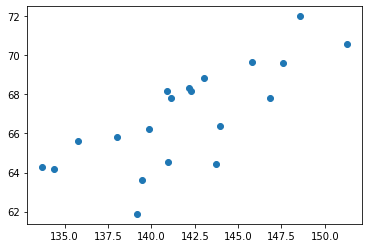

In [825]:
x= top20['Defending']
y = top20['OVA']
plt.scatter(x, y)

In [826]:
x = top20['Attacking']
y = top20['OVA']

In [827]:
from sklearn import linear_model

model = linear_model.LinearRegression()
x = top20[['Attacking']]
y = top20['OVA']
result = model.fit(x,y)

In [828]:
result.score(x,y)
# It is a very high value of R square, hence it is a good model

0.8499704430192694

In [829]:
#NEW UPDSATE

In [830]:
fifamaster = fifa

In [831]:
fifa.head(3)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male


In [832]:
# We clean our new dataset with out columns that wont be used for this analysis

In [833]:
fifamaster.shape

(17125, 107)

In [834]:
fifamaster.drop(['ID','Position','Club Logo','Player Photo','Flag Photo','Team & Contract','Team & Contract'],axis=1,inplace=True)
fifamaster.drop(['Joined','Wage'],axis=1,inplace=True)
fifamaster.drop(['IR','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LAM'],axis=1,inplace=True)
fifamaster.drop(['LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB'],axis=1,inplace=True)
fifamaster.drop(['LB','LCB','CB','RCB','RB','GK','Gender','Hits'],axis=1,inplace=True)

In [835]:
fifamaster.shape

(17125, 69)

In [836]:
fifamaster.head()

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,"6'0""",181lbs,...,3 ★,2★,Medium,High,71,59,70,71,68,69
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,"5'10""",143lbs,...,4 ★,3★,Medium,Medium,53,69,73,69,58,63
2,J. Cole,33,71,England,Coventry City,71,CAM,71,"5'9""",161lbs,...,4 ★,4★,Medium,Low,45,68,76,77,36,52
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,"5'11""",165lbs,...,3 ★,1★,NaN,NaN,61,66,66,69,47,60
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,...,4 ★,4★,High,Medium,58,70,85,85,63,59


In [837]:
# As we are talking about the Selection, we will drop playes with out induvidual score(OVA) than 75
# we will drop the values we dont want to take in account

In [838]:
fifamaster = fifamaster[fifamaster['OVA']>75].reset_index(drop=True)

In [839]:
fifamaster.shape

(1743, 69)

In [840]:
#We reduce the players from 17125 rows to 1743

In [841]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              17125 non-null  object 
 1   Age               17125 non-null  int64  
 2   OVA               17125 non-null  int64  
 3   Nationality       17125 non-null  object 
 4   Club              17102 non-null  object 
 5   BOV               17125 non-null  int64  
 6   BP                17125 non-null  object 
 7   POT               17125 non-null  int64  
 8   Height            17125 non-null  object 
 9   Weight            17125 non-null  object 
 10  foot              17125 non-null  object 
 11  Growth            17125 non-null  int64  
 12  Loan Date End     910 non-null    object 
 13  Value             17125 non-null  object 
 14  Release Clause    17125 non-null  object 
 15  Contract          17125 non-null  object 
 16  Attacking         17125 non-null  int64 

In [842]:
fifamaster.head(3)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,...,4 ★,4★,High,Medium,58,70,85,85,63,59
1,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,77,"5'7""",159lbs,...,4 ★,4★,Medium,Medium,44,71,83,77,62,66
2,R. Giggs,39,78,Wales,Manchester United,78,CAM,78,"5'10""",157lbs,...,2 ★,3★,Medium,Medium,60,72,85,77,41,57


In [843]:
# We might need to use height and wheight at some point, so we will adjust the info in a way we could use

In [844]:
def adjust_metrics(x):
    x = x.replace("'",".")
    x = x.replace('"',"")
    x=x.replace("lbs",'')
    if ((".") in x):
        x = x.split(".")
        x = round((int(x[0])*12+int(x[1])) * 2.54, 1)
    return int(x)

In [845]:
x = "150lbs"
a = adjust_metrics(x)
a


150

In [846]:
fifamaster['Height'] =fifamaster['Height'].apply(adjust_metrics)
fifamaster['Weight'] =fifamaster['Weight'].apply(adjust_metrics)


In [847]:
fifamaster.sample(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
277,Naldo,36,77,Brazil,AS Monaco,76,CB,77,198,194,...,4 ★,2★,Medium,Medium,50,65,62,60,79,69
384,Luiz Adriano,31,78,Brazil,Spartak Moscow,77,ST,78,182,176,...,3 ★,4★,High,Medium,77,77,66,77,33,66


In [848]:
fifamaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1743 non-null   object 
 1   Age               1743 non-null   int64  
 2   OVA               1743 non-null   int64  
 3   Nationality       1743 non-null   object 
 4   Club              1738 non-null   object 
 5   BOV               1743 non-null   int64  
 6   BP                1743 non-null   object 
 7   POT               1743 non-null   int64  
 8   Height            1743 non-null   int64  
 9   Weight            1743 non-null   int64  
 10  foot              1743 non-null   object 
 11  Growth            1743 non-null   int64  
 12  Loan Date End     44 non-null     object 
 13  Value             1743 non-null   object 
 14  Release Clause    1743 non-null   object 
 15  Contract          1743 non-null   object 
 16  Attacking         1743 non-null   int64  


In [849]:
# He have blank values to take in account in case we use this values and we will so we will fill the information
fifamaster.isnull().sum().sort_values(ascending=False)[fifamaster.isnull().sum()>0]

Loan Date End     1699
Composure           96
D/W                 30
A/W                 30
Agility             24
Curve               24
Vision              24
Volleys             24
Sliding Tackle      24
Balance             24
Jumping             24
Club                 5
Interceptions        3
Positioning          3
dtype: int64

In [850]:
def missing_value (name_of_the_column):
    # fill the missing data for all columns witht the average by position BP
    fifamaster[name_of_the_column] = fifamaster.groupby(['OVA','BP'])[name_of_the_column].apply(lambda x: x.fillna(x.mean()))
    fifamaster[name_of_the_column] = fifamaster[name_of_the_column].fillna(int(fifamaster[name_of_the_column].mean()))

for i in ['Balance','Jumping','Volleys','Curve','Agility','Interceptions','Positioning','Vision','Composure','Sliding Tackle']:
    missing_value(i)

In [851]:
fifamaster.isnull().sum().sort_values(ascending=False)[fifamaster.isnull().sum()>0]

Loan Date End    1699
A/W                30
D/W                30
Club                5
dtype: int64

In [852]:
# We cleaned the emplty values and we have some left, but wont be necesary to do something for our analysis

In [853]:
# We have different possitons and we want to reduce it in six 
fifamaster['BP'].unique()

array(['CAM', 'CM', 'CB', 'CF', 'GK', 'CDM', 'RWB', 'LB', 'ST', 'RM',
       'LWB', 'RW', 'LW', 'LM', 'RB'], dtype=object)

In [854]:
def cat_poss(BP):
   #The function simplifyes the player possition into 3 categories    
    if (BP == 'ST') or (BP == 'CF'):
        return 'Attaker'
    elif (BP =='RWB') or (BP =='RB' ) or (BP =='CB')or (BP =='LB')or (BP =='LWB'):
        return 'Defender'
    elif (BP == 'CM')or (BP =='CAM') or (BP =='CDM') or (BP =='RM')or (BP =='RW')or(BP =='LM')or(BP =='LW')or(BP =='RM')or(BP =='RW')or(BP =='LM')or(BP =='LW'):
        return 'Miedfielder'
    elif BP == 'GK':
        return 'Goalkeeper'

In [855]:
BP = 'CAM'
cat_poss(BP)

'Miedfielder'

In [856]:
fifamaster["Position"] = fifamaster["BP"].apply(cat_poss)

In [857]:
fifamaster.head(2)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Position
0,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,170,150,...,4★,High,Medium,58,70,85,85,63,59,Miedfielder
1,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,77,CM,77,170,159,...,4★,Medium,Medium,44,71,83,77,62,66,Miedfielder


(array([72.,  5.,  2.,  1.,  3.,  1.,  1.,  0.,  0.,  2.]),
 array([  1. ,  22.2,  43.4,  64.6,  85.8, 107. , 128.2, 149.4, 170.6,
        191.8, 213. ]),
 <BarContainer object of 10 artists>)

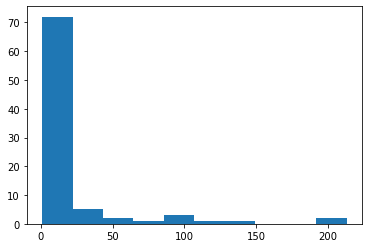

In [858]:
plt.hist(fifamaster["Nationality"].value_counts())

In [859]:
# We will get the top 10 countries with more players OVA >75
T10countriesbyplayers =fifamaster["Nationality"].value_counts().head(10)
T10countriesbyplayers

Spain          213
Brazil         213
France         147
Argentina      112
England        102
Germany        102
Italy           89
Portugal        77
Netherlands     57
Uruguay         50
Name: Nationality, dtype: int64

In [860]:
T10countrieslist = T10countriesbyplayers.keys()
T10countrieslist

Index(['Spain', 'Brazil', 'France', 'Argentina', 'England', 'Germany', 'Italy',
       'Portugal', 'Netherlands', 'Uruguay'],
      dtype='object')

In [861]:
fifamaster["Position"].value_counts()

Miedfielder    778
Defender       521
Attaker        267
Goalkeeper     177
Name: Position, dtype: int64

In [862]:
# we create a dataframe only for the 10 tpo countries
fifatop10=fifa[(fifa['Nationality']=='Spain')|(fifa['Nationality']=='Brazil')|(fifa['Nationality']=='France')|(fifa['Nationality']=='Argentina')|(fifa['Nationality']=='England')|(fifa['Nationality']=='Germany')|(fifa['Nationality']=='Italy')|(fifa['Nationality']=='Portugal')|(fifa['Nationality']=='Netherlands')|(fifa['Nationality']=='Uruguay')]
fifatop10.sample(5)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
15956,E. Martínez,20,68,Uruguay,Nacional de Montevideo,69,CDM,76,"6'0""",176lbs,...,3 ★,2★,Medium,High,65,55,59,63,65,67
6831,Iza Carcelén,27,71,Spain,Cádiz CF,71,RB,72,"5'9""",154lbs,...,3 ★,3★,High,Medium,79,57,68,69,63,75
12728,L. Nieuwpoort,25,61,Netherlands,RKC Waalwijk,63,CB,64,"6'2""",154lbs,...,2 ★,2★,Medium,Medium,64,38,49,58,60,66
2423,Aridane,31,77,Spain,CA Osasuna,77,CB,77,"6'1""",170lbs,...,3 ★,2★,Medium,High,60,36,53,53,76,84
8420,D. Agyei,23,61,England,Oxford United,63,ST,68,"6'0""",170lbs,...,3 ★,2★,High,Medium,73,57,49,60,29,68


In [863]:
#This is the new size of our df
fifatop10.shape

(8347, 69)

In [864]:
fifatop10["Position"] = fifatop10["BP"].apply(cat_poss)
fifatop10['Height'] =fifatop10['Height'].apply(adjust_metrics)
fifatop10['Weight'] =fifatop10['Weight'].apply(adjust_metrics)

C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_2980/1101302815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifatop10["Position"] = fifatop10["BP"].apply(cat_poss)
C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_2980/1101302815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifatop10['Height'] =fifatop10['Height'].apply(adjust_metrics)
C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_2980/1101302815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [865]:
fifatop10.shape

(8347, 70)

In [866]:
fifatop10.columns

Index(['Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'POT',
       'Height', 'Weight', 'foot', 'Growth', 'Loan Date End', 'Value',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Position'],
      dtype='object')

In [867]:
fifatop10.groupby(['Nationality']).agg({'OVA':"mean"}).reset_index().sort_values(by='OVA',ascending=False).head(20)

,Nationality,OVA
1,Brazil,72.004667
7,Portugal,70.569863
0,Argentina,69.668380
8,Spain,69.619982
5,Italy,68.863717
9,Uruguay,68.155224
6,Netherlands,67.795789
3,France,67.792929
4,Germany,66.205373
2,England,63.642648


In [868]:
fifatop10.select_dtypes([np.number])
#fifamaster[fifamaster['Nationality']== 'United States'].select_dtypes([np.number])
#fifamaster.select_dtypes([np.number])

,Age,OVA,BOV,POT,Height,Weight,Growth,Attacking,Crossing,Finishing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,33,69,71,69,182,181,0,313,75,50,...,10,12,1929,408,71,59,70,71,68,69
1,37,71,70,71,177,143,0,337,68,64,...,11,11,1906,385,53,69,73,69,58,63
2,33,71,71,71,175,161,0,337,80,64,...,16,7,1770,354,45,68,76,77,36,52
4,36,81,82,81,170,150,0,367,75,69,...,13,7,2014,420,58,70,85,85,63,59
5,27,66,66,70,172,163,4,271,61,53,...,9,9,1649,360,91,56,56,67,27,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17113,18,64,65,80,167,137,16,260,58,48,...,8,11,1716,366,81,52,54,64,58,57
17116,17,52,54,73,200,185,21,156,28,16,...,7,9,1189,261,61,21,30,32,50,67
17120,22,64,66,69,198,165,5,197,35,23,...,5,7,1367,302,54,30,37,48,64,69
17122,18,56,56,67,175,154,11,218,55,34,...,12,8,1430,303,63,35,44,52,54,55


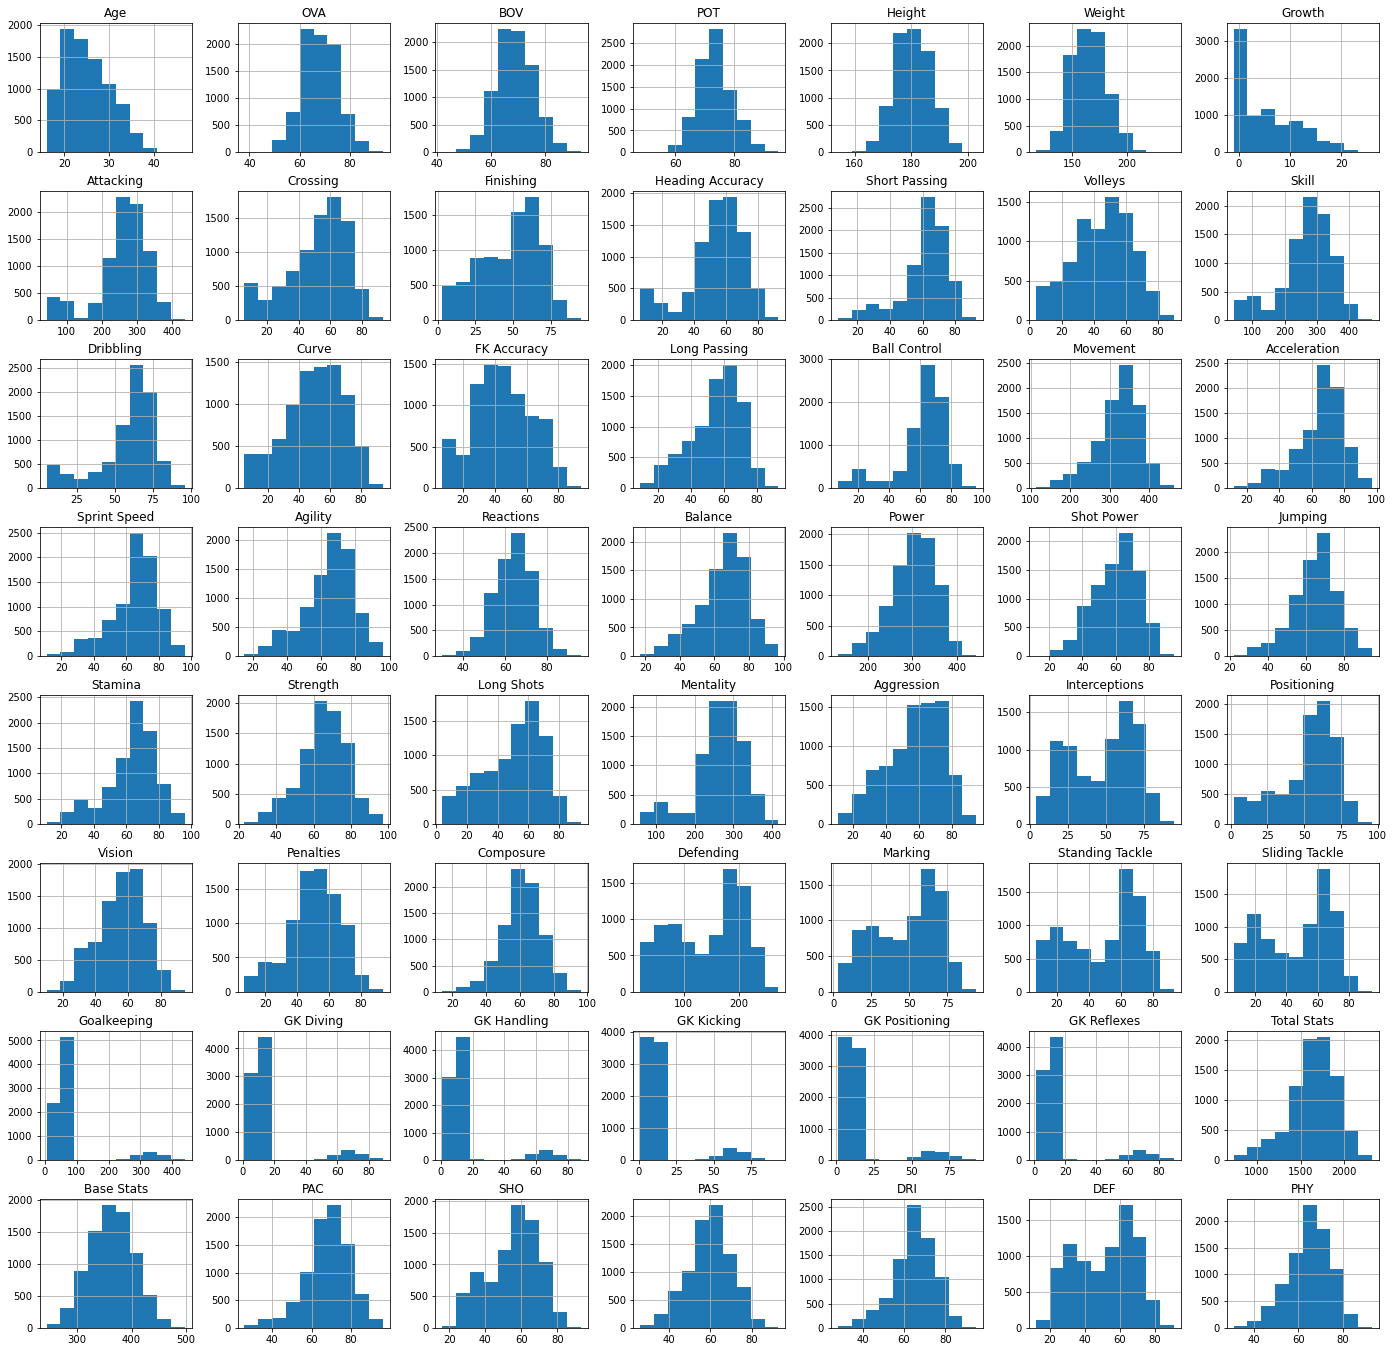

In [869]:
#Whith this hist we can analaize the distribution in every  numeric variable for our fifatop10 countries players
fifatop10.select_dtypes([np.number]).hist(figsize=(24,24))
plt.show()

In [870]:
#Is there any correlation between the position and a particular skill?

In [871]:
#We create a df for analyzing only general skills, taking out particular like Attackng, Defending or the ones for GK
playerskills =fifatop10[['Nationality','OVA','Crossing','Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Marking',
       'Standing Tackle', 'Sliding Tackle','Position']]
playerskills

,Nationality,OVA,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Position
0,Italy,69,75,50,59,71,58.0,338,73,65.0,...,72,69.0,63.0,66.0,50,NaN,70,69,69.0,Defender
1,Spain,71,68,64,61,76,68.0,369,69,79.0,...,71,71.0,72.0,73.0,75,79.0,70,43,40.0,Miedfielder
2,England,71,80,64,41,77,75.0,387,79,84.0,...,69,39.0,69.0,74.0,66,NaN,35,34,30.0,Miedfielder
4,Spain,81,75,69,54,90,79.0,408,85,80.0,...,58,70.0,78.0,93.0,71,89.0,68,57,56.0,Miedfielder
5,Germany,66,61,53,42,58,57.0,276,67,61.0,...,63,26.0,63.0,58.0,46,NaN,22,26,31.0,Miedfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17113,Brazil,64,58,48,49,60,45.0,283,63,60.0,...,72,58.0,61.0,41.0,55,54.0,56,60,62.0,Defender
17116,Germany,52,28,16,49,35,28.0,137,25,24.0,...,45,53.0,20.0,28.0,38,35.0,48,49,57.0,Defender
17120,France,64,35,23,66,47,26.0,193,44,26.0,...,69,58.0,23.0,29.0,39,46.0,61,71,66.0,Defender
17122,England,56,55,34,53,42,34.0,212,52,43.0,...,58,55.0,49.0,45.0,49,43.0,55,54,54.0,Defender


In [872]:
#By the coralation between OVA and skills we can define the 5 skills that each position needs to wanranty the best level.

Positioning     0.928149
Ball Control    0.915874
Reactions       0.899706
Finishing       0.880814
Shot Power      0.858513
Name: OVA, dtype: float64

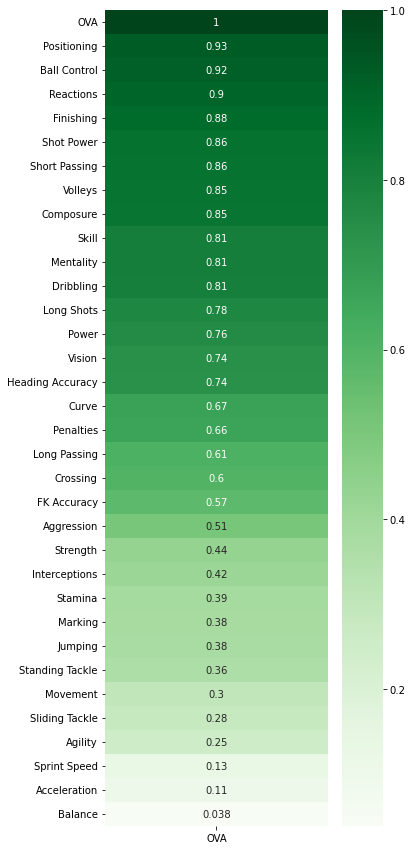

In [873]:
#By find finding the correlation we can find the best 5 qualities for Attackers
Askills = playerskills[playerskills['Position']=='Attaker'].corr().loc[:,['OVA']].sort_values(by='OVA',ascending=False)
plt.subplots(figsize=(5,15))
sns.heatmap(Askills,annot=True,cbar=True,cmap="Greens")
Askills['OVA'].iloc[1:6]
# Intresting to find that the most important quiality in the Attacker is Positiong

Interceptions      0.903449
Sliding Tackle     0.898903
Standing Tackle    0.898101
Reactions          0.897839
Marking            0.884562
Name: OVA, dtype: float64

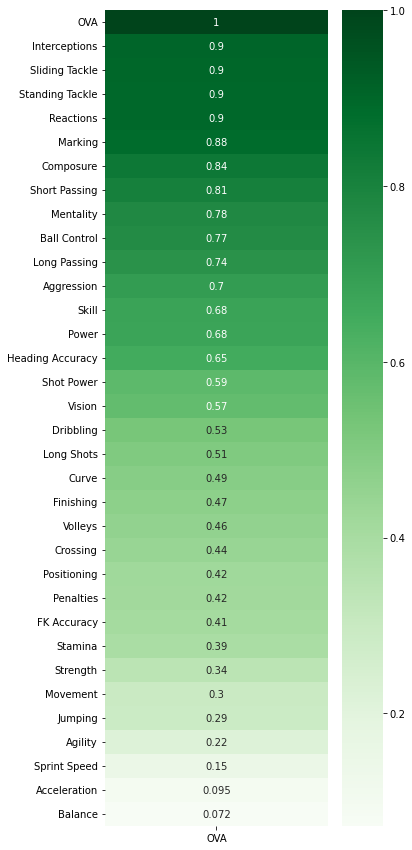

In [874]:
#By find finding the correlation betwwen OVA and each attribute we can find the 5 qualities for Defender
dskills = playerskills[playerskills['Position']=='Defender'].corr().loc[:,['OVA']].sort_values(by='OVA',ascending=False)
plt.subplots(figsize=(5,15))
sns.heatmap(dskills,annot=True,cbar=True,cmap="Greens")
dskills['OVA'].iloc[1:6]

Ball Control     0.910594
Reactions        0.873994
Short Passing    0.845528
Skill            0.844994
Vision           0.837037
Name: OVA, dtype: float64

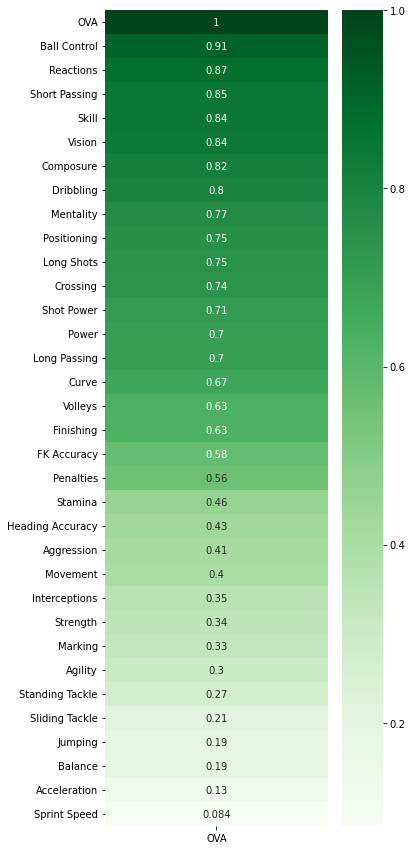

In [875]:
#By find finding the correlation betwwen OVA and each attribute we can find the 5 qualities for miedfielder
mskills = playerskills[playerskills['Position']=='Miedfielder'].corr().loc[:,['OVA']].sort_values(by='OVA',ascending=False)
plt.subplots(figsize=(5,15))
sns.heatmap(mskills,annot=True,cbar=True,cmap="Greens")
mskills['OVA'].iloc[1:6]

Reactions    0.884588
Power        0.695738
Composure    0.648162
Movement     0.635528
Mentality    0.620587
Name: OVA, dtype: float64

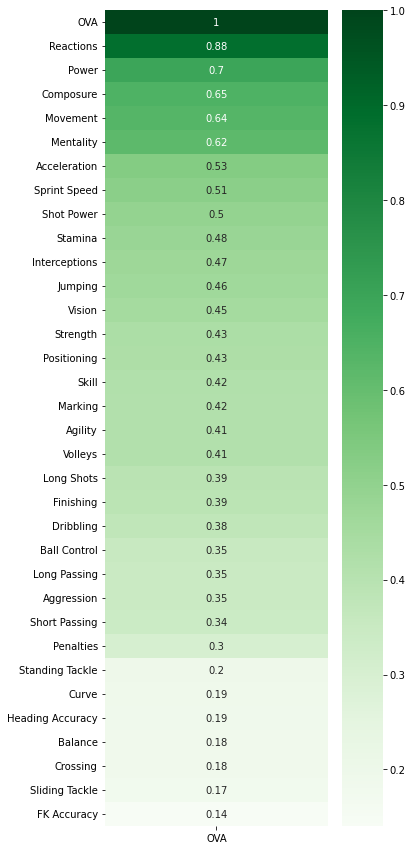

In [876]:
#By find finding the correlation betwwen OVA and each attribute we can find the 5 qualities for goaleeper
gskills = playerskills[playerskills['Position']=='Goalkeeper'].corr().loc[:,['OVA']].sort_values(by='OVA',ascending=False)
plt.subplots(figsize=(5,15))
sns.heatmap(gskills,annot=True,cbar=True,cmap="Greens")
gskills['OVA'].iloc[1:6]

In [877]:
#is there any correlation between OVA

In [878]:
fifatop10.columns

Index(['Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'POT',
       'Height', 'Weight', 'foot', 'Growth', 'Loan Date End', 'Value',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Position'],
      dtype='object')

In [879]:
#is there any correlation betweent age and mentality?

In [880]:
fifatop10[['Age','Mentality']].corr()

,Age,Mentality
Age,1.000000,0.279542
Mentality,0.279542,1.000000


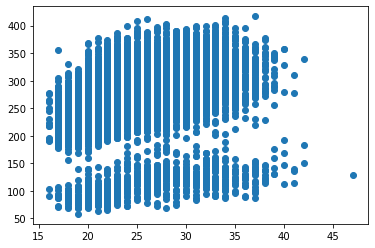

In [881]:
plt.scatter(fifatop10['Age'],fifatop10['Mentality'])

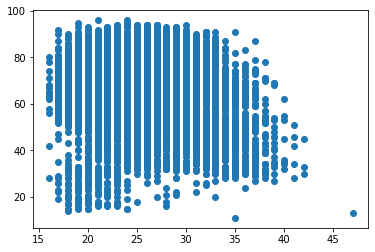

In [882]:
plt.scatter(fifatop10['Age'],fifatop10['Sprint Speed'])

In [883]:
fifatop10[['Age','Sprint Speed']].corr()

,Age,Sprint Speed
Age,1.000000,-0.188878
Sprint Speed,-0.188878,1.000000


In [884]:
fifatop10[['Age','Acceleration']].corr()

,Age,Acceleration
Age,1.000000,-0.187242
Acceleration,-0.187242,1.000000


In [885]:
fifatop10.sample(5)

,Name,Age,OVA,Nationality,Club,BOV,BP,POT,Height,Weight,...,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Position
6763,M. Aramu,24,68,Italy,Venezia FC,70,LM,70,180,152,...,3★,Medium,Medium,74,62,66,74,45,58,Miedfielder
9538,L. Guwara,24,68,Germany,FC Utrecht,68,LB,72,185,183,...,3★,Medium,Medium,75,34,57,64,64,72,Defender
10117,A. Diakhaby,23,70,France,Huddersfield Town,71,ST,76,182,163,...,3★,High,Low,89,65,63,70,23,54,Attaker
4650,H. Reed,25,73,England,Fulham,74,CDM,79,170,159,...,3★,Medium,High,68,57,71,70,69,68,Miedfielder
10090,Domingos Duarte,25,78,Portugal,Granada CF,80,CB,82,190,172,...,2★,Medium,Medium,54,35,55,53,79,78,Defender


In [886]:
fifatop10['Position']=='Miedfielder']

SyntaxError: unmatched ']' (Temp/ipykernel_2980/1990654208.py, line 1)

In [887]:
fifatop10['Position'].unique()

array(['Defender', 'Miedfielder', 'Goalkeeper', 'Attaker'], dtype=object)

In [888]:
fifatop10['Position'].value_counts()

Miedfielder    3455
Defender       2800
Attaker        1294
Goalkeeper      798
Name: Position, dtype: int64

In [889]:
#fifatop10[fifatop10['Position']=='Defender'].corr().loc[:,['Height','Heading Accuracy']]
#fifatop10.corr().loc[:,['Heading Accuracy']]

In [890]:
#Best Defenders by OVA
fifatop10[fifatop10['Position']=='Defender'].groupby(['Position','Nationality']).agg({'OVA':'mean'}).sort_values(by='OVA',ascending=False)

OVA
Position Nationality           
Defender Brazil       72.462633
         Portugal     70.914729
         Spain        69.571429
         Argentina    69.190476
         Italy        69.190217
         Uruguay      68.450980
         France       68.207101
         Netherlands  68.006410
         Germany      66.107579
         England      64.004950

In [891]:
fifatop10[fifatop10['Position']=='Attaker'].groupby(['Position','Nationality']).agg({'OVA':'mean'}).sort_values(by='OVA',ascending=False)

OVA
Position Nationality           
Attaker  Brazil       70.911765
         Argentina    69.820312
         Netherlands  68.671233
         Italy        68.541667
         Spain        68.381579
         Portugal     68.208333
         Uruguay      67.428571
         France       67.098039
         Germany      65.086420
         England      62.833922

In [892]:
#BEst Miedfielers
fifatop10[fifatop10['Position']=='Miedfielder'].groupby(['Position','Nationality']).agg({'OVA':'mean'}).sort_values(by='OVA',ascending=False)

OVA
Position    Nationality           
Miedfielder Brazil       71.973404
            Portugal     71.124224
            Spain        70.038618
            Argentina    69.871060
            Italy        68.902326
            Uruguay      68.077465
            Netherlands  67.972973
            France       67.830918
            Germany      66.541020
            England      63.902985

In [893]:
fifatop10.columns

Index(['Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'POT',
       'Height', 'Weight', 'foot', 'Growth', 'Loan Date End', 'Value',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'Position'],
      dtype='object')

In [898]:
fifatop10[['Value','Release Clause', 'Contract','Loan Date End']]

,Value,Release Clause,Contract,Loan Date End
0,€625K,€0,2008 ~ 2016,NaN
1,€600K,€1.1M,2014 ~ 2019,NaN
2,€1.1M,€0,2016 ~ 2020,NaN
4,€5.5M,€7.2M,2018 ~ 2021,NaN
5,€725K,€0,2011 ~ 2012,NaN
...,...,...,...,...
17113,€850K,€1.9M,2020 ~ 2025,NaN
17116,€100K,€245K,2020 ~ 2022,NaN
17120,€550K,€0,"Jun 30, 2021 On Loan","Jun 30, 2021"
17122,€130K,€273K,2020 ~ 2022,NaN


In [933]:
#how many Loans are
fifatop10['Loan Date End'].notnull().sum()

497

In [1007]:
fifatop10['Value'].isnull().sum()

0

In [934]:
loanplayers = fifatop10[fifatop10['Loan Date End'].notnull()]
loanplayers[['Loan Date End','Value']].sample(2)

,Loan Date End,Value
7791,2020-06-30,575000
7047,2021-06-30,1400000


In [935]:
#Changing format for the colum Value
fifatop10['Value'] = fifatop10['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_2980/3252822935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifatop10['Value'] = fifatop10['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)


In [936]:
fifatop10[['Value','Release Clause', 'Contract','Loan Date End']]

,Value,Release Clause,Contract,Loan Date End
0,625000,€0,2008 ~ 2016,NaT
1,600000,€1.1M,2014 ~ 2019,NaT
2,1100000,€0,2016 ~ 2020,NaT
4,5500000,€7.2M,2018 ~ 2021,NaT
5,725000,€0,2011 ~ 2012,NaT
...,...,...,...,...
17113,850000,€1.9M,2020 ~ 2025,NaT
17116,100000,€245K,2020 ~ 2022,NaT
17120,550000,€0,"Jun 30, 2021 On Loan",2021-06-30
17122,130000,€273K,2020 ~ 2022,NaT


In [937]:
fifatop10['Loan Date End']

0              NaT
1              NaT
2              NaT
4              NaT
5              NaT
           ...    
17113          NaT
17116          NaT
17120   2021-06-30
17122          NaT
17124          NaT
Name: Loan Date End, Length: 8347, dtype: datetime64[ns]

In [942]:
fifatop10['Loan Date End']= pd.to_datetime(fifatop10['Loan Date End'])
loanplayer=fifatop10[fifatop10['Loan Date End'].notnull()]

C:\Users\SERGIO~1\AppData\Local\Temp/ipykernel_2980/1395769471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifatop10['Loan Date End']= pd.to_datetime(fifatop10['Loan Date End'])


In [946]:
loanplayer[['Value','Loan Date End']]

,Value,Loan Date End
174,400000,2018-06-30
230,1100000,2018-06-30
329,240000,2021-06-30
636,2400000,2019-06-30
748,775000,2021-06-30
...,...,...
16938,325000,2021-06-30
17044,120000,2021-06-30
17057,1300000,2021-06-30
17071,400000,2021-06-30


In [ ]:
#Is the value increase or decarease as log as the loan ends

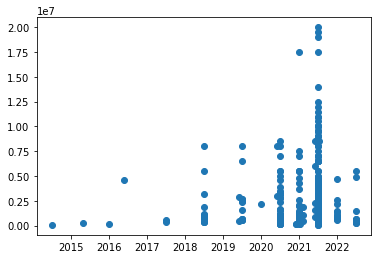

In [952]:
import seaborn as sns
#sns.regplot(loanplayer['Loan Date End'],loanplayer['Value'])
plt.scatter(loanplayer['Loan Date End'],loanplayer['Value'])
plt.show()

In [954]:
fifatop10[['Value','OVA']].corr()

,Value,OVA
Value,1.000000,0.653411
OVA,0.653411,1.000000


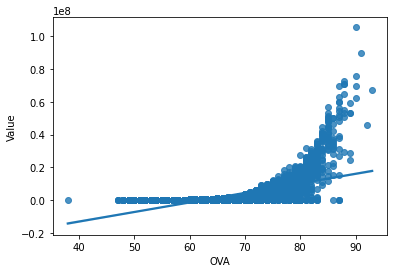

In [958]:
sns.regplot(fifatop10['OVA'],fifatop10['Value'])
plt.show()
#More than a linear linear correlation looks like exponential after 75 OVA

<AxesSubplot:xlabel='OVA', ylabel='Value'>

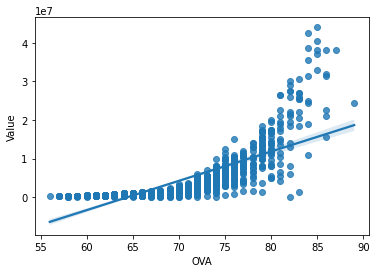

In [971]:
#What about German players
sns.regplot((fifatop10['OVA'][fifatop10['Nationality'] == 'Spain']) ,(fifatop10['Value'][fifatop10['Nationality'] == 'Spain']))
#fifatop10['OVA'][fifatop10['Nationality'] == 'Spain'] 

C:\dataanalyst\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OVA', ylabel='Value'>

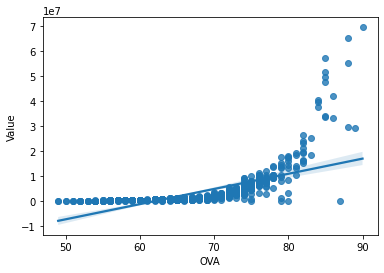

In [972]:
sns.regplot((fifatop10['OVA'][fifatop10['Nationality'] == 'Germany']) ,(fifatop10['Value'][fifatop10['Nationality'] == 'Germany']))

<AxesSubplot:xlabel='Aggression', ylabel='OVA'>

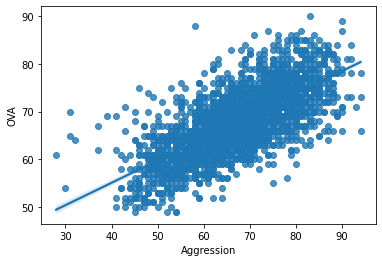

In [985]:
sns.regplot((fifatop10['Aggression'][fifatop10['Position'] == 'Defender']) ,(fifatop10['OVA'][fifatop10['Position'] == 'Defender']))

In [987]:
#As we can see there is a high correlation between position based on the OVA 
fifatop10[['Aggression','OVA']][fifatop10['Position'] == 'Defender'].corr()

,Aggression,OVA
Aggression,1.00000,0.70451
OVA,0.70451,1.00000


In [988]:
fifatop10[['Aggression','OVA']][fifatop10['Position'] == 'Attaker'].corr()

,Aggression,OVA
Aggression,1.00000,0.50886
OVA,0.50886,1.00000


In [990]:
fifatop10[['Aggression','OVA']][fifatop10['Position'] == 'Miedfielder'].corr()

,Aggression,OVA
Aggression,1.000000,0.410975
OVA,0.410975,1.000000


In [ ]:
# We could create a model to identify the salary for players with OVA lower than 8

In [1004]:
fifatop10[['OVA','Value']].sort_values(by="Value")

,OVA,Value
3778,53,0
13337,80,0
2334,66,0
218,78,0
13336,78,0
...,...,...
3961,88,71000000
4049,88,72500000
4166,90,75500000
2650,91,90000000


In [1001]:
fifatop10[['OVA','Value']][(fifatop10['OVA']< 70) & (fifatop10['OVA']> 50)].corr()

,OVA,Value
OVA,1.000000,0.758999
Value,0.758999,1.000000


C:\dataanalyst\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OVA', ylabel='Value'>

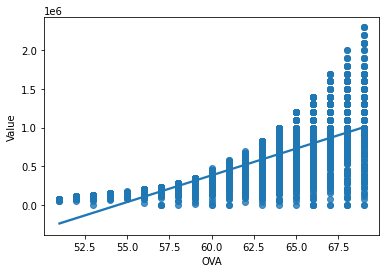

In [999]:
sns.regplot((fifatop10['OVA'][(fifatop10['OVA']< 70) & (fifatop10['OVA']> 50)]) , (fifatop10['Value'][(fifatop10['OVA']< 70) & (fifatop10['OVA']> 50)]))


In [1014]:
from sklearn import linear_model

model = linear_model.LinearRegression()

x = fifatop10[['OVA']][(fifatop10['OVA']< 70) & (fifatop10['OVA']> 50)]
y = fifatop10['Value'][(fifatop10['OVA']< 70) & (fifatop10['OVA']> 50)]

result = model.fit(x,y)
result.score(x,y)

0.5760792189743115

In [ ]:
#Not a very effitient way because the high error

In [1015]:
model = linear_model.LinearRegression()

x = fifatop10[['OVA']][(fifatop10['OVA']< 90) & (fifatop10['OVA']> 50)]
y = fifatop10['Value'][(fifatop10['OVA']< 90) & (fifatop10['OVA']> 50)]

result = model.fit(x,y)
result.score(x,y)

0.4492864436695585